# 啟用 Colab:

In [1]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
print(tf.__version__)
tf.test.gpu_device_name()

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.0


'/device:GPU:0'

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/My Drive/keras-yolo3


# 安裝keras 2.2.4的版本: 
  與檢視GPU狀態與cUDA nvcc版本。

In [3]:
pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

In [0]:
!nvidia-smi

Thu Feb 27 16:06:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    34W / 250W |    265MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
print(GPUs)
#gpu = GPUs[0]

def printGPU():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  #print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
  
printGPU()

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=376824f36328eb9adfe4159dabf027d0c5c2b0a0f1763c6e80f73435feb5641c
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 26.0 GB  | Proc size: 621.4 MB


In [0]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


# keras-yolo3系統環境路徑設定:

/app -> '/content/gdrive/My Drive/keras-yolo3'

In [0]:
import sys
cur = '/content/gdrive/My Drive/keras-yolo3'
sys.path.append(cur)

In [5]:
!ln -fs '/content/gdrive/My Drive/keras-yolo3' /app
!ls -al /app
%cd /app
!pwd
!ls -al

lrwxrwxrwx 1 root root 36 Feb 28 01:21 /app -> '/content/gdrive/My Drive/keras-yolo3'
/content/gdrive/My Drive/keras-yolo3
/content/gdrive/My Drive/keras-yolo3
total 968669
-rw------- 1 root root      7532 Feb 26 13:48  2007_test.txt
-rw------- 1 root root     12131 Feb 26 13:47  2007_train.txt
-rw------- 1 root root      4205 Feb 26 13:47  2007_val.txt
-rw------- 1 root root      1323 Feb 26 08:37  coco_annotation.py
-rw------- 1 root root     10280 Feb 26 08:37  convert.py
-rw------- 1 root root      5707 Feb 26 08:37  darknet53.cfg
-rw------- 1 root root    163759 Feb 26 08:37  dog.jpg
drwx------ 2 root root      4096 Feb 26 08:37  font
drwx------ 2 root root      4096 Jan 20 08:35  .git
-rw------- 1 root root      1201 Jan 20 08:35  .gitignore
-rw------- 1 root root    133495 Feb 26 08:37  horses.jpg
-rw------- 1 root root      6067 Feb 26 08:37  __init__.py
-rw------- 1 root root         0 Feb 28 01:41  keras-yolo3
-rw------- 1 root root      3866 Feb 26 08:37 'kmeans (1).py'
-rw-

#  Step1: run 1_create_ImageSets.py 產生出以下 4個檔案
>>> VOCdevkit/VOC2007/1_create_ImageSets.py
output:
1. VOCdevkit/VOC2007/ImageSets/Main/train.txt
2. VOCdevkit/VOC2007/ImageSets/Main/test.txt
3. VOCdevkit/VOC2007/ImageSets/Main/trainval.txt
4. VOCdevkit/VOC2007/ImageSets/Main/val.txt

In [0]:
%cd /app
!ls -al VOCdevkit/VOC2007/ImageSets/Main
!chmod 755 *
!ls -al

/content/gdrive/My Drive/keras-yolo3
total 17
-rw------- 1 root root 1100 Feb 26 13:45 test.txt
-rw------- 1 root root 1611 Feb 26 13:45 train.txt
-rw------- 1 root root 1659 Feb 26 13:45 trainval.txt
-rw------- 1 root root  559 Feb 26 13:45 val.txt
-rw------- 1 root root 8326 Feb 25 03:03 yolov3_my_train.cfg
-rw------- 1 root root 1910 Feb 25 03:03 yolov3-tiny_my_train.cfg
total 968669
-rwx------ 1 root root      7532 Feb 26 13:48  2007_test.txt
-rwx------ 1 root root     12131 Feb 26 13:47  2007_train.txt
-rwx------ 1 root root      4205 Feb 26 13:47  2007_val.txt
-rwx------ 1 root root      1323 Feb 26 08:37  coco_annotation.py
-rwx------ 1 root root     10280 Feb 26 08:37  convert.py
-rwx------ 1 root root      5707 Feb 26 08:37  darknet53.cfg
-rwx------ 1 root root    163759 Feb 26 08:37  dog.jpg
drwx------ 2 root root      4096 Feb 26 08:37  font
drwx------ 2 root root      4096 Jan 20 08:35  .git
-rw------- 1 root root      1201 Jan 20 08:35  .gitignore
-rwx------ 1 root root   

In [0]:
###!python 1_create_ImageSets.py 

In [0]:
!cat /app/VOCdevkit/VOC2007/ImageSets/Main/train.txt
#!cat /app/VOCdevkit/VOC2007/ImageSets/Main/test.txt
#!cat /app/VOCdevkit/VOC2007/ImageSets/Main/trainval.txt
#!cat /app/VOCdevkit/VOC2007/ImageSets/Main/val.txt

00001
00005
00006
00012
00017
00018
00019
00004
00009
00029
00032
00039
00041
00040
00044
00045
00047
00048
00049
00061
00062
00066
00073
00078
00080
00060
00089
00088
00092
00094
00095
00102
00107
00103
00096
00111
00114
00117
00120
00127
00129
00128
00131
00132
00136
00143
00148
00151
00150
00161
00168
00166
00170
00172
00177
00182
00183
raccoon-100
raccoon-103
raccoon-105
raccoon-107
raccoon-108
raccoon-109
raccoon-11
raccoon-111
raccoon-110
raccoon-114
raccoon-117
raccoon-119
raccoon-122
raccoon-131
raccoon-129
raccoon-133
raccoon-134
raccoon-138
raccoon-139
raccoon-14
raccoon-140
raccoon-142
raccoon-144
raccoon-148
raccoon-153
raccoon-151
raccoon-156
raccoon-155
raccoon-159
raccoon-165
raccoon-166
raccoon-173
raccoon-175
raccoon-174
raccoon-178
raccoon-179
raccoon-180
raccoon-182
raccoon-181
raccoon-185
raccoon-193
raccoon-189
raccoon-197
raccoon-192
raccoon-198
raccoon-200
raccoon-30
raccoon-31
raccoon-39
raccoon-43
raccoon-45
raccoon-48
raccoon-49
raccoon-5
raccoon-55
raccoon-56

# Step2: 修改yolov3文件夹下的voc_annotation.py文件，將classes修改為自己數據的類別，然後再執行voc_annotation.py 生成yolo格式的標註文件:
Modify: line7 - classes = ["kangaroo", "raccoon"]
>>> voc_annotation.py
output:
1. 2007_train.txt 
2. 2007_test.txt
3. 2007_val.txt

以下的程式碼負責把下載下來的 Pascal VOC 資料集轉換為訓練模型時需要的格式，執行"./voc_annotation.py";
原始碼:
https://github.com/qqwweee/keras-yolo3/blob/master/voc_annotation.py

In [0]:
%cd /app
!chmod 755 *
!ls -al | grep voc_annotation.py
###!python voc_annotation.py

/content/gdrive/My Drive/keras-yolo3
-rwx------ 1 root root      1485 Feb 26 11:20 voc_annotation.py


In [0]:
!cat 2007_train.txt

./VOCdevkit/VOC2007/JPEGImages/00001.jpg 130,100,269,262,0 231,95,354,261,0
./VOCdevkit/VOC2007/JPEGImages/00005.jpg 519,220,850,459,0
./VOCdevkit/VOC2007/JPEGImages/00006.jpg 90,305,225,399,0 186,173,378,419,0
./VOCdevkit/VOC2007/JPEGImages/00012.jpg 285,167,550,342,0
./VOCdevkit/VOC2007/JPEGImages/00017.jpg 65,3,492,386,0
./VOCdevkit/VOC2007/JPEGImages/00018.jpg 236,1,474,264,0
./VOCdevkit/VOC2007/JPEGImages/00019.jpg 186,84,277,337,0 387,160,596,403,0
./VOCdevkit/VOC2007/JPEGImages/00004.jpg 13,77,318,228,0
./VOCdevkit/VOC2007/JPEGImages/00009.jpg 36,139,236,341,0
./VOCdevkit/VOC2007/JPEGImages/00029.jpg 145,55,342,259,0
./VOCdevkit/VOC2007/JPEGImages/00032.jpg 80,29,258,352,0
./VOCdevkit/VOC2007/JPEGImages/00039.jpg 173,26,314,277,0 289,52,454,276,0
./VOCdevkit/VOC2007/JPEGImages/00041.jpg 321,119,962,480,0
./VOCdevkit/VOC2007/JPEGImages/00040.jpg 460,139,524,203,0
./VOCdevkit/VOC2007/JPEGImages/00044.jpg 485,58,710,480,0 505,292,587,390,0
./VOCdevkit/VOC2007/JPEGImages/00045.jpg 1

In [0]:
!cat 2007_test.txt

./VOCdevkit/VOC2007/JPEGImages/00026.jpg 308,292,488,405,0
./VOCdevkit/VOC2007/JPEGImages/00028.jpg 61,71,287,359,0 143,96,675,456,0
./VOCdevkit/VOC2007/JPEGImages/00030.jpg 35,29,224,426,0
./VOCdevkit/VOC2007/JPEGImages/00042.jpg 260,433,562,767,0
./VOCdevkit/VOC2007/JPEGImages/00046.jpg 1,109,223,288,0 320,105,570,332,0
./VOCdevkit/VOC2007/JPEGImages/00052.jpg 130,38,307,218,0
./VOCdevkit/VOC2007/JPEGImages/00065.jpg 84,41,240,426,0
./VOCdevkit/VOC2007/JPEGImages/00064.jpg 64,155,452,434,0
./VOCdevkit/VOC2007/JPEGImages/00074.jpg 35,40,487,450,0
./VOCdevkit/VOC2007/JPEGImages/00071.jpg 98,162,455,340,0
./VOCdevkit/VOC2007/JPEGImages/00077.jpg 1,125,221,335,0
./VOCdevkit/VOC2007/JPEGImages/00084.jpg 15,136,475,396,0
./VOCdevkit/VOC2007/JPEGImages/00083.jpg 219,178,943,530,0
./VOCdevkit/VOC2007/JPEGImages/00091.jpg 385,157,717,655,0
./VOCdevkit/VOC2007/JPEGImages/00105.jpg 121,48,444,537,0
./VOCdevkit/VOC2007/JPEGImages/00110.jpg 156,76,446,221,0
./VOCdevkit/VOC2007/JPEGImages/00116.jp

In [0]:
!cat 2007_val.txt

./VOCdevkit/VOC2007/JPEGImages/00002.jpg 165,106,245,308,0 250,106,419,309,0
./VOCdevkit/VOC2007/JPEGImages/00024.jpg 91,62,279,363,0 242,253,521,425,0
./VOCdevkit/VOC2007/JPEGImages/00038.jpg 219,15,432,275,0
./VOCdevkit/VOC2007/JPEGImages/00053.jpg 663,177,902,549,0 274,167,605,446,0 124,267,275,450,0
./VOCdevkit/VOC2007/JPEGImages/00056.jpg 247,4,314,252,0 1,117,248,254,0
./VOCdevkit/VOC2007/JPEGImages/00059.jpg 133,195,800,524,0
./VOCdevkit/VOC2007/JPEGImages/00072.jpg 131,65,230,369,0
./VOCdevkit/VOC2007/JPEGImages/00075.jpg 36,85,421,255,0 61,25,149,74,0 1,37,59,75,0 246,44,293,78,0
./VOCdevkit/VOC2007/JPEGImages/00079.jpg 173,77,715,465,0
./VOCdevkit/VOC2007/JPEGImages/00087.jpg 152,42,401,348,0
./VOCdevkit/VOC2007/JPEGImages/00097.jpg 79,194,838,582,0
./VOCdevkit/VOC2007/JPEGImages/00109.jpg 92,86,483,372,0
./VOCdevkit/VOC2007/JPEGImages/00112.jpg 75,263,117,311,0 266,247,375,374,0 510,361,699,453,0
./VOCdevkit/VOC2007/JPEGImages/00121.jpg 14,113,568,379,0
./VOCdevkit/VOC2007/J

# Step3: 修改kmeans.py內的filename 為"2007_train.txt" (有2處:line 8 and line 

*   List item
*   List item

99)。
output
1. yolo_anchors.txt

In [0]:
%cd /app
!ls -al |grep 2007_train.txt
!ls -al |grep kmeans.py
###!python kmeans.py

/content/gdrive/My Drive/keras-yolo3
-rwx------ 1 root root     12131 Feb 26 13:47 2007_train.txt
-rwx------ 1 root root      3865 Feb 26 08:37 kmeans.py


In [0]:
!cat ./yolo_anchors.txt

64,69, 126,157, 147,100, 156,251, 201,187, 262,364, 302,225, 423,424, 617,317

#### 將上述9個bbox，修改填入 /app/model_data/yolo_anchors.txt。
step4.2 上述結果會得到9個anchors的坐標值與準確率。並記錄下這9個座標值，然後將"model_data\yolo_anchors.txt"內容(按照該文本中的格式)，將這9個anchors值(9個座標值)依序修改填入，存檔即可。
修改後如下:

In [0]:
%cd /app/
!cat model_data/yolo_anchors.txt
!cat /app/model_data/yolo_anchors.txt

/content/gdrive/My Drive/keras-yolo3
64,69,  126,157,  147,100,  156,251,  201,187,  262,364,  302,225,  423,424,  617,31764,69,  126,157,  147,100,  156,251,  201,187,  262,364,  302,225,  423,424,  617,317

# Step4. 修改yolov3.cfg 檔案內容，符合自己的數據：
#### (若要再訓練，需再修改yolov3.cfg來調參數)。

In [0]:
%cd /app
!cat /app/yolov3.cfg

/content/gdrive/My Drive/keras-yolo3
[net]
# Testing
#batch=24
#subdivisions=8
# Training
batch=64
subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
#c1#angle=0
angle=10
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 6000
policy=steps
#c1#steps=4000,4500
#c1#scales=.1,.1
steps=50,100,150 #100,500,1000
scales=.01,.0003,.0001

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=

# Step5. 將"train.py"中的"annotation_path修改(從train.txt)為"2007_train.txt"。

In [0]:
!cat /app/train.py

"""
Retrain the YOLO model for your own dataset.
"""
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


# Add by Angus.
# 將 yolo.py 所需要的套件載入
import colorsys
import os
from timeit import default_timer as timer
from PIL import Image, ImageFont, ImageDraw
from yolo3.utils import letterbox_image
from keras.utils import multi_gpu_model

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # Python PIL “IOError: image file truncated” with big images: https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images

def _main():
    #annotation_path = 'train.txt'
    annotation_path = '2007_train.txt'
    log_dir = '/app/logs/000/'
   

# Step6. 下載 yolov3 的網路權重，並且把權重轉換為 keras 能夠讀取的格式:

  >>> 轉換.cfg/.weights 檔案為.h5格式:
  >>> 將"./yolov3.cfg" + "./yolov3.weight" 轉換成 "./model_data/yolo.h5"

把 YOLO weights 轉換為能夠提供給 keras 作為訓練新模型的初始權重，注意這部分多了一個 -w 的參數，可以參考 https://github.com/qqwweee/keras-yolo3/blob/master/convert.py#L242 以及 https://stackoverflow.com/questions/42621864/difference-between-keras-model-save-and-model-save-weights 理解其中差別

In [0]:
import os
if not os.path.exists("model_data/yolov3_weights.h5"):
  # 下載 yolov3 的網路權重，並且把權重轉換為 keras 能夠讀取的格式
  print("Model doesn't exist, downloading...")
  os.system("wget https://pjreddie.com/media/files/yolov3.weights")
  print("Converting yolov3.weights to yolov3_weights.h5...")
  os.system("python convert.py yolov3.cfg yolov3.weights model_data/yolov3_weights.h5")
else:
  print("Model exist")
!chmod 755 /app/model_data/*
!ls -al /app/model_data |grep .h5

Model exist
-rwx------ 1 root root  35556672 Feb 26 09:12 yolov3-tiny.h5
-rwx------ 1 root root 247006248 Feb 27 06:17 yolov3_weights.h5


In [0]:
!chmod 755 /app/logs/000/*
!ls -al /app/logs/000/ |grep .h5

-rwx------ 1 root root 246888592 Feb 27 05:54 trained_weights_final_c1.h5
-rwx------ 1 root root 246888592 Feb 27 14:02 trained_weights_final_c3.h5
-rwx------ 1 root root 246888592 Feb 27 04:22 trained_weights_final_c4.h5


# Step7. 開始訓練(Training):

In [4]:
# 將 train.py 所需要的套件載入
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

from train import get_classes, get_anchors, create_model, create_tiny_model, data_generator, data_generator_wrapper

Using TensorFlow backend.


ModuleNotFoundError: ignored

In [0]:
annotation_path = '2007_train.txt' # 轉換好格式的標註檔案
log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
classes_path = 'model_data/voc_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

input_shape = (416,416) # multiple of 32, hw

is_tiny_version = len(anchors)==6 # default setting
if is_tiny_version:
    model = create_tiny_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
else:
    model = create_model(input_shape, anchors, num_classes,
        #freeze_body=2, weights_path='model_data/yolov3_weights.h5') # make sure you know what you freeze #cycle1: val_loss:93
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c1.h5')  #cycle2: 15s 1s/step - loss: 27.2819 - val_loss: 23.6706
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c2_2.h5')  #x
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c2.h5')  #cycle3: 14s 1s/step - loss: 18.6572 - val_loss: 18.2865
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c3.h5')   #cycle4: 15s 1s/step - loss: 18.1191 - val_loss: 21.1819
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c4_2.h5')   #cycle5: 
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c5_2.h5')   #cycle6: 
        #freeze_body=2, weights_path=log_dir + 'trained_weights_final_c6_2.h5')   #cycle7:: 
        freeze_body=2, weights_path=log_dir + 'trained_weights_final_c7_2.h5')   #cycle7:: 

logging = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
    monitor='val_loss', save_weights_only=True, save_best_only=True, period=3) #10) #50) #100) #3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1) #cycle1,2
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=50, verbose=1) #cycle3:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1) #cycle4_2:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

# 分為 training 以及 validation
val_split = 0.1
with open(annotation_path) as f:
    lines = f.readlines()
np.random.seed(10101)
np.random.shuffle(lines)
np.random.seed(None)
num_val = int(len(lines)*val_split)
num_train = len(lines) - num_val

# Train with frozen layers first, to get a stable loss.
# Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
# 一開始先 freeze YOLO 除了 output layer 以外的 darknet53 backbone 來 train
if True:
    #lr = 1e-3 ##cycle1,2, c5_2
    #lr = 1e-4 #cycle3
    #lr = 1e-5 #cycle4_2
    lr = 1e-7 #cycle7_2
    sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=SGD(lr=lr), loss={
    #model.compile(optimizer=Adam(lr=lr), loss={
        # use custom yolo_loss Lambda layer.
        'yolo_loss': lambda y_true, y_pred: y_pred})

    batch_size = 16
    #batch_size = 8 #c5_2:
    #batch_size = 4 #c6_2:
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    # 模型利用 generator 產生的資料做訓練，強烈建議大家去閱讀及理解 data_generator_wrapper 在 train.py 中的實現
    model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            #epochs=50,
            epochs=20, #c5_2
            initial_epoch=0,
            callbacks=[logging, checkpoint])
    model.save_weights(log_dir + 'trained_weights_stage_1.h5')
    train1_loss = model.history.history["loss"]
    valid1_loss = model.history.history["val_loss"]


# Unfreeze and continue training, to fine-tune.
# Train longer if the result is not good.
if True:
    # 把所有 layer 都改為 trainable
    for i in range(len(model.layers)):
        model.layers[i].trainable = True
    #lr = 1e-4
    lr = 1e-8
    sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss={'yolo_loss': lambda y_true, y_pred: y_pred})
    #model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change #c5_2
    #model.compile(optimizer=Adam(lr=1e-5), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
    #model.compile(optimizer=Adam(lr=1e-6), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
    print('Unfreeze all of the layers.')

    batch_size = 16 # note that more GPU memory is required after unfreezing the body
    #batch_size = 8 # note that more GPU memory is required after unfreezing the body #c5_2
    #batch_size = 4 # note that more GPU memory is required after unfreezing the body #c5_2
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
        steps_per_epoch=max(1, num_train//batch_size),
        validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
        validation_steps=max(1, num_val//batch_size),
        epochs= 70,
        #initial_epoch=50,
        initial_epoch=20, #c5_2
        callbacks=[logging, checkpoint, reduce_lr, early_stopping])
    model.save_weights(log_dir + 'trained_weights_final.h5')
    train2_loss = model.history.history["loss"]
    valid2_loss = model.history.history["val_loss"]

model_data/yolo_anchors.txt
64,69,  126,157,  147,100,  156,251,  201,187,  262,364,  302,225,  423,424,  617,317
64,69,  126,157,  147,100,  156,251,  201,187,  262,364,  302,225,  423,424,  617,317
416 416
Create YOLOv3 model with 9 anchors and 2 classes.
Load weights logs/000/trained_weights_final_c7_2.h5.
Freeze the first 250 layers of total 252 layers.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 416, 41

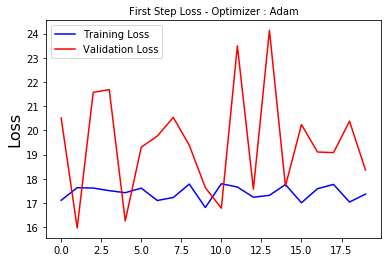

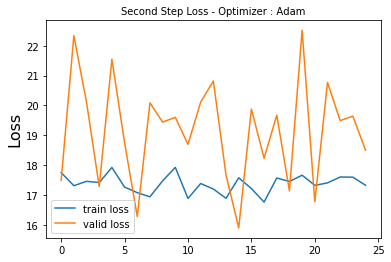

In [0]:
# loss 值的圖
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
#classes_path = 'model_data/voc_classes.txt'
#yolo_model = YOLO(model_path= log_dir + 'trained_weights_final_c4.h5', classes_path=classes_path)

plt.title('First Step Loss - Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(range(len(train1_loss)), train1_loss, color='b', label='Training Loss')
plt.plot(range(len(valid1_loss)), valid1_loss, color='r', label='Validation Loss')
plt.legend()
plt.show()

plt.title('Second Step Loss - Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(range(len(train2_loss)), train2_loss, label="train loss")
plt.plot(range(len(valid2_loss)), valid2_loss, label="valid loss")
plt.legend()
plt.show()


# Step8. 測試:
  

In [0]:
%cd /app
!chmod 777 /app/logs/000/*
!ls -al /app/logs/000/
!ls -al '/content/gdrive/My Drive/hw050/test-images/'

/content/gdrive/My Drive/keras-yolo3
total 2419733
-rwx------ 1 root root 246888592 Feb 27 15:59 ep021-loss17.752-val_loss17.495.h5
-rwx------ 1 root root 246888592 Feb 27 15:59 ep024-loss17.418-val_loss17.286.h5
-rwx------ 1 root root 246888592 Feb 27 16:00 ep027-loss17.081-val_loss16.283.h5
-rwx------ 1 root root   8916859 Feb 27 16:03 events.out.tfevents.1582819140.34317c989104
-rwx------ 1 root root 246888592 Feb 27 14:02 trained_weights_final_c3.h5
-rwx------ 1 root root 246888592 Feb 27 14:30 trained_weights_final_c4_2.h5
-rwx------ 1 root root 246888592 Feb 27 14:55 trained_weights_final_c5_2.h5
-rwx------ 1 root root 246888592 Feb 27 15:09 trained_weights_final_c6_2.h5
-rwx------ 1 root root 246888592 Feb 27 15:50 trained_weights_final_c7_2.h5
-rwx------ 1 root root 246888592 Feb 27 16:03 trained_weights_final.h5
-rwx------ 1 root root 246888592 Feb 27 15:58 trained_weights_stage_1.h5
total 22041
-rw------- 1 root root   528757 Feb 27 04:50 190603ANI11-e1559551900286.png
-rw---

In [8]:
#detect:
from yolo import YOLO
from PIL import Image
#from keras.models import load_model

annotation_path = '2007_train.txt' # 轉換好格式的標註檔案
log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
classes_path = 'model_data/voc_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'

#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-868036500-1024x1024.jpg'
detect_file = '/content/gdrive/My Drive/hw050/test-images/600_phpq4nCYg.jpg'

#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-1097009490-1024x1024.jpg'

image = Image.open(detect_file) 
yolo_model = YOLO(model_path= log_dir + 'trained_weights_final_c7_2.h5', classes_path=classes_path)
r_image = yolo_model.detect_image(image)

logs/000/trained_weights_final_c7_2.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(416, 416, 3)
Found 1 boxes for img
kangaroo 0.77 (32, 249) (305, 964)
7.782902200999956


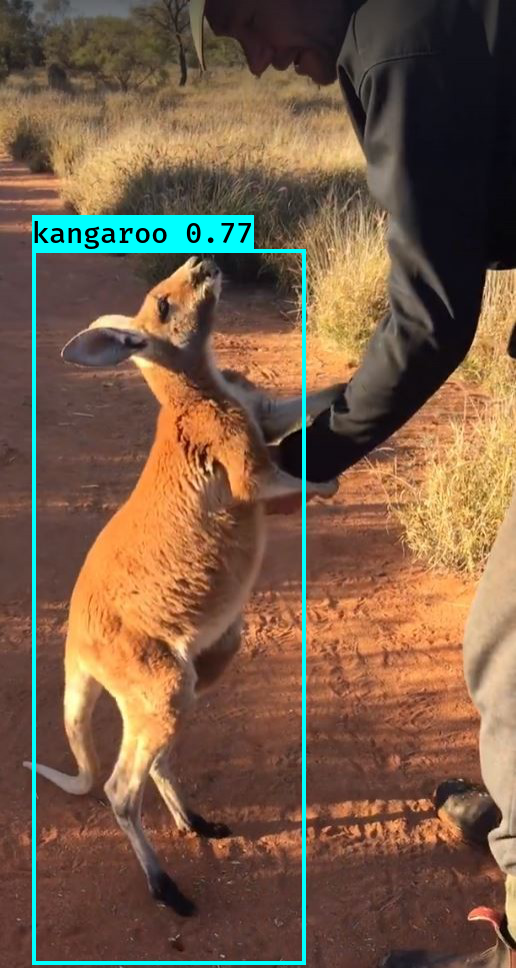

In [9]:
r_image

In [20]:
#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-865019440-1024x1024.jpg'

#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-1023969996-1024x1024.jpg'


detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-1077128024-1024x1024.jpg'
#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-1097009490-1024x1024.jpg'
#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-529402069-1024x1024.jpg'
#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-826008870-1024x1024.jpg'
#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-843803958-1024x1024.jpg'
#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-857248350-1024x1024.jpg'

#detect_file = '/content/gdrive/My Drive/hw050/test-images/istockphoto-868036500-1024x1024.jpg'

image = Image.open(detect_file) 
yolo_model = YOLO(model_path= log_dir + 'trained_weights_final_c7_2.h5', classes_path=classes_path)
r_image = yolo_model.detect_image(image)

logs/000/trained_weights_final_c7_2.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 2 boxes for img
raccoon 0.33 (494, 242) (659, 627)
kangaroo 0.85 (474, 282) (677, 604)
4.1129377669999485


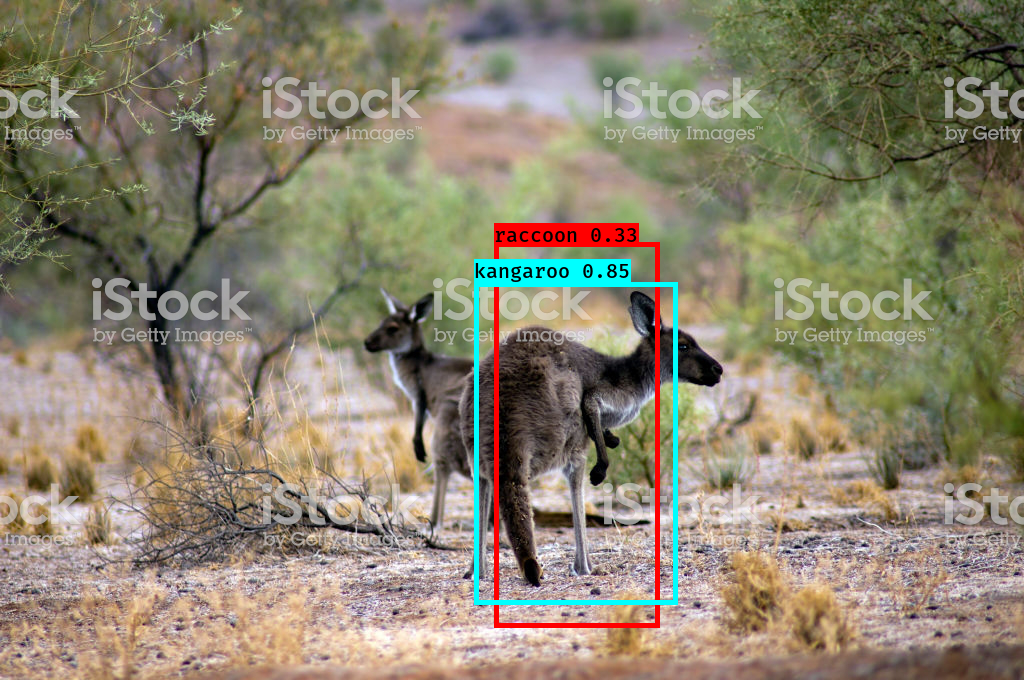

In [21]:
r_image

In [12]:
from yolo import YOLO
from PIL import Image
from os import listdir
from os.path import isfile, isdir, join

import matplotlib.pyplot as plt
import matplotlib.image as mpimg # mpimg 用于读取图片
%matplotlib inline


#for image in r_image:
  ###lena = mpimg.imread('lena.png') # 读取和代码处于同一目录下的 lena.png
  ### 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
  ###lena.shape #(512, 512, 3)
  #plt.imshow(image) # 显示图片
  #plt.axis('off') # 不显示坐标轴
  #plt.legend()
  #plt.show()

annotation_path = '2007_train.txt' # 轉換好格式的標註檔案
log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
classes_path = 'model_data/voc_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'

mypath = '/content/gdrive/My Drive/hw050/test-images'
# 取得所有檔案與子目錄名稱
files = listdir(mypath)

r_image = []
# 以迴圈處理
for f in files:
  # 產生檔案的絕對路徑
  fullpath = join(mypath, f)
  # 判斷 fullpath 是檔案還是目錄
  if isfile(fullpath):
    detect_file = mypath + '/' + f
    print("file:", detect_file)
    image = Image.open(detect_file) 
    yolo_model = YOLO(model_path= log_dir + 'trained_weights_final_c7_2.h5', classes_path=classes_path)
    detected_image = yolo_model.detect_image(image)
    r_image.append(detected_image)

    plt.imshow(detected_image) # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.legend()
    plt.show()
  #elif isdir(fullpath):
  #  print("目錄：", f)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from yolo import YOLO
import  yolo
log_dir = 'logs/000/' # 訓練好的模型儲存的路徑
classes_path = 'model_data/voc_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'

vedio_file = '/content/gdrive/My Drive/hw050/test-images/raccoon_1.mp4'

yolo_model = YOLO(model_path=log_dir + 'trained_weights_final_c7_2.h5', classes_path=classes_path) #trained_weights_final
r_image = yolo.detect_video(yolo_model,vedio_file)

logs/000/trained_weights_final_c7_2.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 0 boxes for img
4.966524808000031
